## IMDB Sentiment Model using the Nlarc Optimizer

Epoch 1/20
391/391 [==============================] - 322s 808ms/step - loss: 0.6673 - accuracy: 0.5574 - val_loss: 0.5137 - val_accuracy: 0.7544
Epoch 2/20
391/391 [==============================] - 292s 747ms/step - loss: 0.4360 - accuracy: 0.8061 - val_loss: 0.4362 - val_accuracy: 0.8174
Epoch 3/20
391/391 [==============================] - 284s 726ms/step - loss: 0.3289 - accuracy: 0.8628 - val_loss: 0.3698 - val_accuracy: 0.8379
Epoch 4/20
391/391 [==============================] - 281s 719ms/step - loss: 0.2770 - accuracy: 0.8886 - val_loss: 0.3084 - val_accuracy: 0.8735
Epoch 5/20
391/391 [==============================] - 281s 720ms/step - loss: 0.2447 - accuracy: 0.9061 - val_loss: 0.3092 - val_accuracy: 0.8717
Epoch 6/20
391/391 [==============================] - 281s 718ms/step - loss: 0.2171 - accuracy: 0.9162 - val_loss: 0.3007 - val_accuracy: 0.8750
Epoch 7/20
391/391 [==============================] - 280s 716ms/step - loss: 0.1967 - accuracy: 0.9259 - val_loss: 0.3563 -

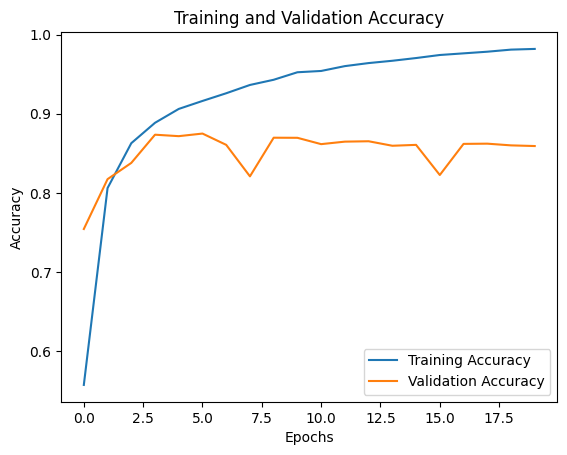

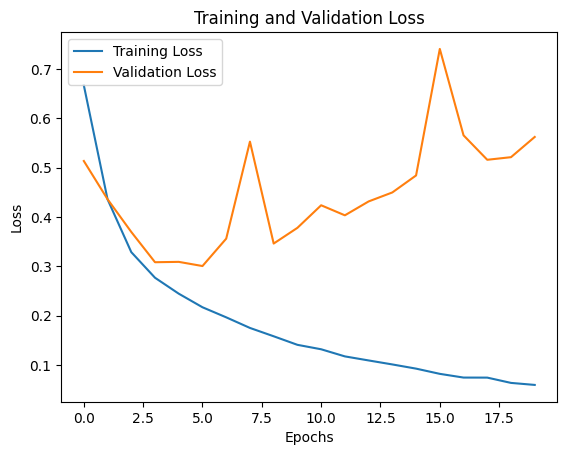

In [3]:
import os
# Set TensorFlow environment variables to suppress logs
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # Only show errors
os.environ['TF_CPP_MIN_VLOG_LEVEL'] = '3'  # Further suppression of verbose logs
os.environ['TF_GPU_ALLOCATOR'] = 'cuda_malloc_async' # Configure TensorFlow GPU allocator

import tensorflow as tf

tf.keras.backend.set_floatx('float64')

from src.optimizers import Nlarc

from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
import matplotlib.pyplot as plt

# Set parameters
vocab_size = 20000  # Only consider the top 20,000 words
maxlen = 200        # Only consider the first 200 words of each movie review
embedding_dim = 128 # Dimension of the embedding space
batch_size = 64
epochs = 20

# Load the IMDb dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# Pad sequences to ensure all reviews have the same length
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

# Build the model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(128)))
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
optimizer = Nlarc(learning_rate=0.1, momentum=1, global_clipnorm=1, sigma=1e-30, k0=1) # 

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(x_test, y_test), verbose=1)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Plotting training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plotting training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()
